# OBJECTIVE 

Goal of this project:
1. To study the following parameters: price, vehicle's age when the ad was placed, mileage, number of cylinders, and condition. 
2. Identify, and clean the data for missing, duplicate and errroneous values.
3. Identify and address the outliers.tudy how many days advertisements were displayed (days_listed).
4. Use the clean data to understand the factors that impact product price and  identify the correlation if any between price and advertisement lifetime.

### Step 1. Open the data file and study the general information. 

In [1]:
import pandas as pd
df = pd.read_csv('https://code.s3.yandex.net//datasets/vehicles_us.csv')
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [ ]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [ ]:
pd.options.display.float_format = "{:,.1f}".format

In [ ]:
df['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
price           51525 non-null int64
model_year      47906 non-null float64
model           51525 non-null object
condition       51525 non-null object
cylinders       46265 non-null float64
fuel            51525 non-null object
odometer        43633 non-null float64
transmission    51525 non-null object
type            51525 non-null object
paint_color     42258 non-null object
is_4wd          25572 non-null float64
date_posted     51525 non-null object
days_listed     51525 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

### Conclusion

1. The data has in total 51525 records.
2. There was missing data in model_year, cylinders, odometer, paint_colour, and whether the car was 4 wheel drive or not. 
3. No duplicates identified

### Step 2. Data preprocessing

#### Step 2.1 Replacing missing values

In [ ]:
# replacing missing value with 0 assuming people left the data empty instead of writing 0
df['is_4wd_processed'] =  df['is_4wd'].fillna(0)

In [ ]:
# The reason i am using mode after groupng the data by model is that I assume that similar model of cars have similar number of cylinders. And mode will help ascertain the most often  appearing value in the group

df['cylinders_mode'] = df.groupby('model')['cylinders'].transform(lambda grp:grp.fillna(grp.mode()[0]))

In [ ]:
# Replacing the missing value in model year with the median after grouping data by model, since mean and median are different
df['model_year_median'] = df.groupby('model')['model_year'].apply(lambda x:x.fillna(x.median()))

In [ ]:
# Excluding the 0 values in the odometer readin and then replacing the missing values with non zero values mean
nonzero_mean = df[ df.odometer != 0 ].mean()

# Then replace the zero values with this mean :
df.loc[ df.odometer == 0, "odometer" ] = nonzero_mean

In [ ]:
df['odometer_mean'] = df['odometer'].fillna(df['odometer'].mean())

In [ ]:
#Replacing the missing value in paint_colour with the mode after grouping data by model 

df.groupby('model')['paint_color'].value_counts()


model              paint_color
acura tl           grey           55
                   black          44
                   silver         36
                   white          26
                   blue            9
                                  ..
volkswagen passat  grey           38
                   red            17
                   green           5
                   brown           4
                   custom          4
Name: paint_color, Length: 1019, dtype: int64

In [ ]:
df['paint_color_mode'] = df.groupby('model')['paint_color'].transform(lambda grp:grp.fillna(grp.mode()[0]))

In [ ]:
#change 0 in age_car with 1
df.loc[df['Age_car'] == 0,'Age_car']= 1

### Conclusion
>There was missing data in model_year, cylinders, odometer, paint_colour, and whether the car was 4 wheel drive or not.

* Model_year is replaced by first grouping the data by model and then using fillna method to replace the missing values with median. I used median since the mean is being pulled down by low values.
* Number of cylinders were replaced after grouping the data by model and then fillna method with replacing the missing value with mode. Assumption the same model will have similar number of cylinders and then taking the most frequent value in the models for the number of cylinders
* Odometer missing values were filled using fillna method with the using the mean. The mean values were computed using all non null values. 
* Paint_color missing values were replaced using fillna method using the most frequent value of mode colour for each model 
* The 4 wheel drive had 2 values, 0 and 1, the data might be missing because people assumed that if the car didnt have 4 wheel drive they can leave the column blank. Therefore fillig this data missing data with 0


#### Step 2.2 Changing data types to match variable type
1. date_posted - datetime - since it is a date 
2. is_wd_processed - integer since there are either 1 or 0 as the values representing present and absence of the feature
3. cylinder_mode- integer - again these range from 3 to 12 
4. model_year_median - datetime - since it is a year value


In [ ]:
#1. date_posted - datetime
import datetime as dt
df.loc[:,'date_posted'] = pd.to_datetime(df.loc[:,'date_posted'], format = '%Y-%m-%d')                                    

In [ ]:
#2. is_wd_processed - bool
df['is_4wd_processed'] = df['is_4wd_processed'].astype('bool')

In [ ]:
#3. cylinder_mode- integer
df['cylinders_mode'] = df['cylinders_mode'].astype('int')

In [ ]:
#4. model_year_median - integer
df['model_year_median'] = df['model_year_median'].astype('int')


### Conclusion :
1. The data which captures date , or time information was changed to datetime. 
2. is4 wd was converted to bool type since 0 means the absence of the feature and 1 means the feature is present.
3. Cylinder captures the number of cyliners therefore changing it from float to integer.
4. Model year is a whole number so changing values from float to integer.

### Step 3. Adding calculated data to the table to make actionable insights

In [ ]:
#Adding the day of the week, month, and year the ad was placed
# 1.day of the week of the ad
df['date_posted_week'] = pd.DatetimeIndex(df['date_posted']).weekday

In [ ]:
# 2.month of the ad
df['date_posted_month'] = pd.DatetimeIndex(df['date_posted']).month

In [ ]:
#3. year of the ad
df['date_posted_year'] = pd.DatetimeIndex(df['date_posted']).year

In [ ]:
#Adding a column with age of car : Date_posted - Model_year
df['Age_car'] = df['date_posted_year'] - df['model_year_median']

In [28]:
df['Age_car'] = df['Age_car'].astype('int')

In [29]:
#Adding a column with average mileage per year
df['Average_mileage'] = df['odometer_mean']/df['Age_car'] 

In [30]:
df['Average_mileage']= round(df['Average_mileage'])

In [31]:
#Replacing string values with numeric scale
df.loc[df['condition'] == 'new','condition']= 5
df.loc[df['condition'] == 'like new','condition']= 4    
df.loc[df['condition'] == 'excellent','condition']= 3    
df.loc[df['condition'] == 'good','condition']= 2
df.loc[df['condition'] == 'fair','condition']= 1
df.loc[df['condition'] == 'salvage','condition']= 0 

### Conclusion


1. Using DateTimeIndex to get the date, month and year for further caluclation
2. Usig the year from the above calcualtions, calculating the age of the car, by subtracting the model year value from the year of manufacturing which we computed earlier using the DateTimeIndex method
3. The age of the car data type is converted to int data type since age is a whole number
4. Average mileage is calculated by dividing the odometer by age of the car
5. For the string values in condition, replacing the string values with numbers, based on the condition of the car. New represented by 5, like new by 4, excellent by 3 , good by 2 , fair by 1 and salvage by 0.

### Step 4. Carry out exploratory data analysis

In [32]:
df.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,cylinders_mode,model_year_median,odometer_mean,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
count,"51,525.0","47,906.0","51,525.0","46,265.0","43,448.0","25,572.0","51,525.0","51,525.0","51,525.0","51,525.0","51,525.0","51,525.0","51,525.0","51,525.0","51,525.0"
mean,"12,132.5","2,009.8",2.6,6.1,"116,045.5",1.0,39.6,6.1,"2,009.8","116,045.5",3.0,6.6,"2,018.3",8.6,"19,321.4"
std,"10,040.8",6.3,0.7,1.7,"64,793.9",0.0,28.2,1.7,6.1,"59,499.0",2.0,3.5,0.5,6.1,"17,228.4"
min,1.0,"1,908.0",0.0,3.0,1.0,1.0,0.0,3.0,"1,908.0",1.0,0.0,1.0,"2,018.0",1.0,0.0
25%,"5,000.0","2,006.0",2.0,4.0,"70,765.0",1.0,19.0,4.0,"2,007.0","80,000.0",1.0,3.0,"2,018.0",4.0,"10,550.0"
50%,"9,000.0","2,011.0",3.0,6.0,"113,358.5",1.0,33.0,6.0,"2,011.0","116,045.5",3.0,7.0,"2,018.0",8.0,"15,087.0"
75%,"16,839.0","2,014.0",3.0,8.0,"155,033.5",1.0,53.0,8.0,"2,014.0","146,541.0",5.0,10.0,"2,019.0",12.0,"22,272.0"
max,"375,000.0","2,019.0",5.0,12.0,"990,000.0",1.0,271.0,12.0,"2,019.0","990,000.0",6.0,12.0,"2,019.0",110.0,"373,200.0"


### Investigating the parameter : Price

Text(0, 0.5, 'Frequency')

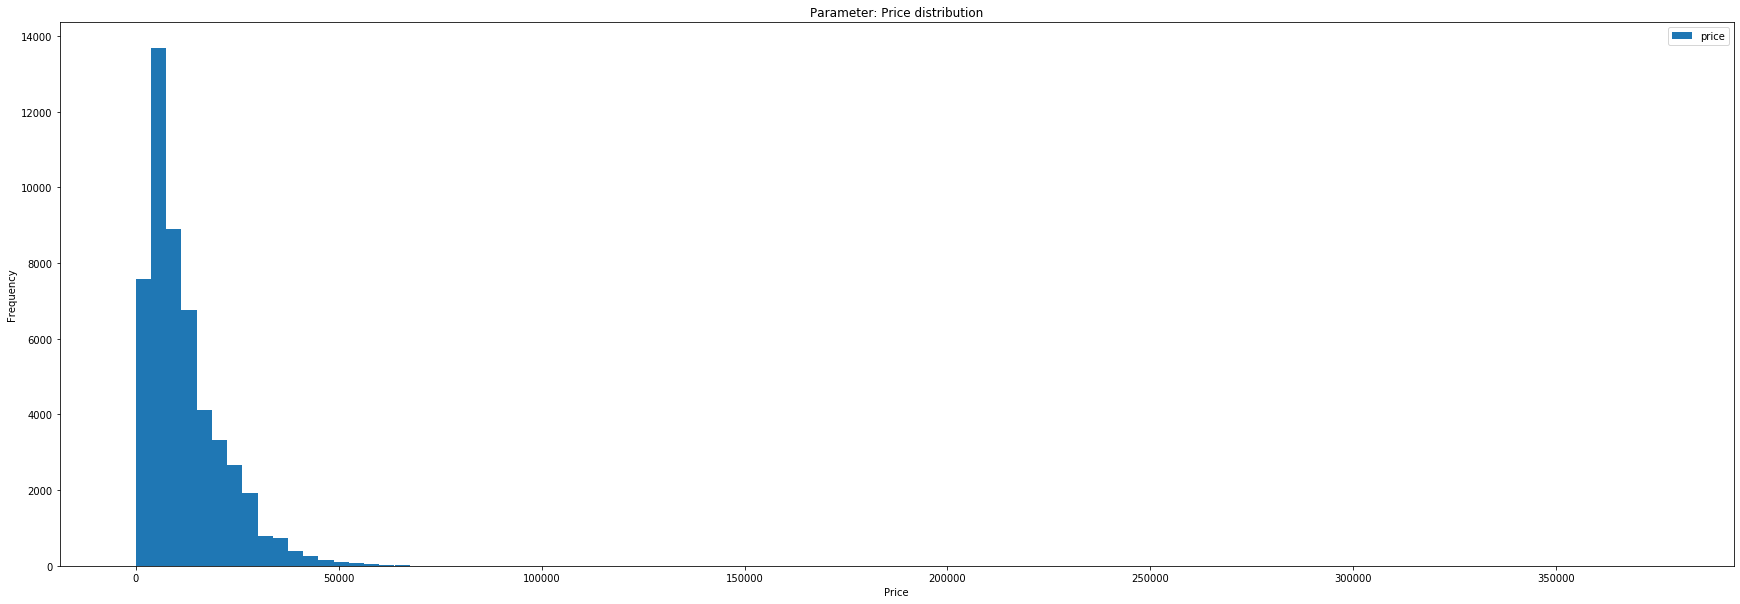

In [33]:
from matplotlib import pyplot as plt
df.plot(kind = 'hist', y = 'price', bins = 100, figsize=(30,10)) ;
# Add title and axis names
plt.title("Parameter: Price distribution")
plt.xlabel("Price")
plt.ylabel("Frequency")
 


#### Summary Price Range
#1. The range is from somewhere close to 1 and goes all the way upto 350000
#2. To get a clearer view I will look at values from 0 to 70000

### Conclusion: Price parameter


1. It is a large spread out chart
2. Smallest value 0 , largest value 375000
3. The spead is somewhat skewed to the left
4. The majority of the observations fall in 1 to 8000 value
5. The values start to taper doown from 8000. 
6. An abnormal peak is observed at close to 0, which is around 800 values. 

### Investigating the parameter : Age of car

Text(0, 0.5, 'Count')

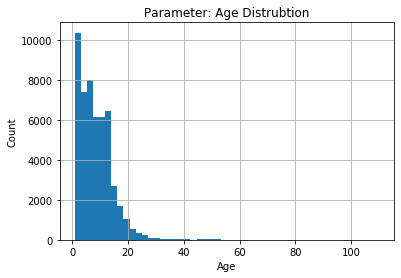

In [36]:
import matplotlib.pyplot as plt
df['Age_car'].hist(bins=50) ;
plt.title("Parameter: Age Distrubtion")
plt.xlabel("Age")
plt.ylabel("Count")

Range for age of car is from 1 to 110
Majority of the cars are aged below 15 years.
Exploring the range 0 to 50 and 51 to 100 separately

### Conclusion: Age_car parameter

1. Range is from 1 to 100 years
2. Left skewed graph.
3. 80% of the data is within 0 to 12 years. 

### Investigating the parameter : Average mileage

Text(0, 0.5, 'Frequency')

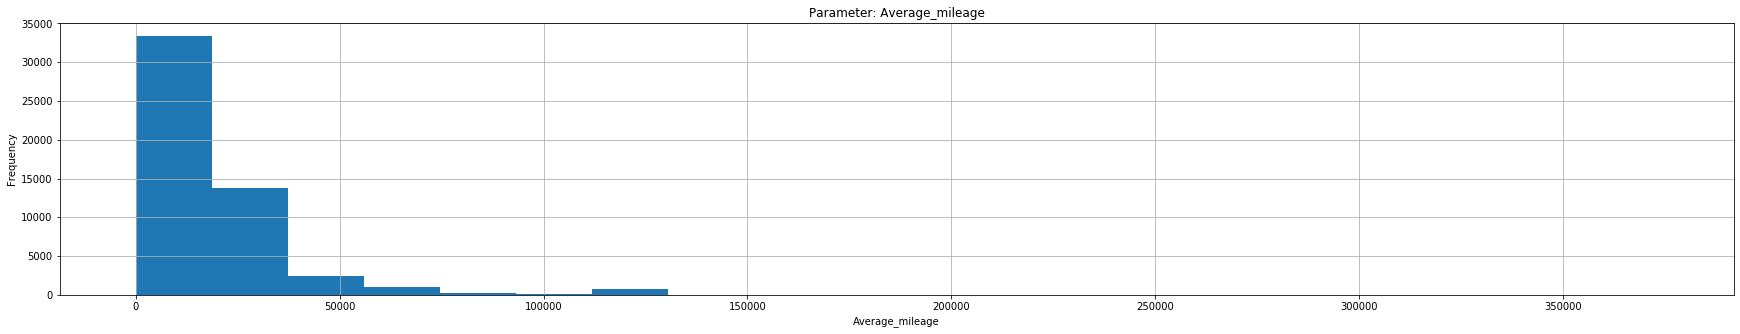

In [39]:
import matplotlib.pyplot as plt
df['Average_mileage'].hist(bins = 20, figsize=(30,5)) ;
plt.title("Parameter: Average_mileage")
plt.xlabel("Average_mileage")
plt.ylabel("Frequency");



### Conclusion: Average Mileage parameter

1. Range for mileage between 1 to 350000
2. Approx range of category that is most frequent is 8000 to 20000
3. Small peak at 39000 and near 0 are atypical values

### Investigating the parameter : Cylinders

Text(0, 0.5, 'Frequency')

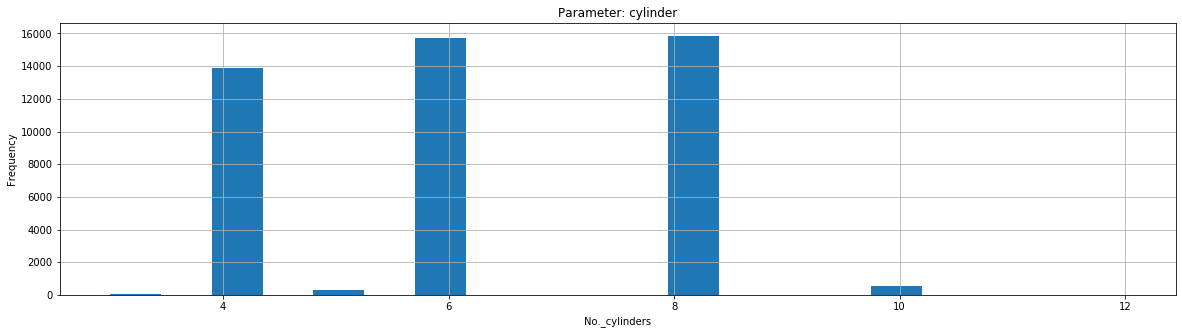

In [41]:
df['cylinders'].hist(bins=20, figsize=(20,5)) ;

plt.title("Parameter: cylinder")
plt.xlabel("No._cylinders")
plt.ylabel("Frequency")


### Conclusion number of cylinders:

1. Range for number of cylinders is between 2 to 12
2. Approx range of category that is most frequent is 4 to 8
3. 10 and 12 are very few in frequency

### Investigating the parameter : Condition of the car

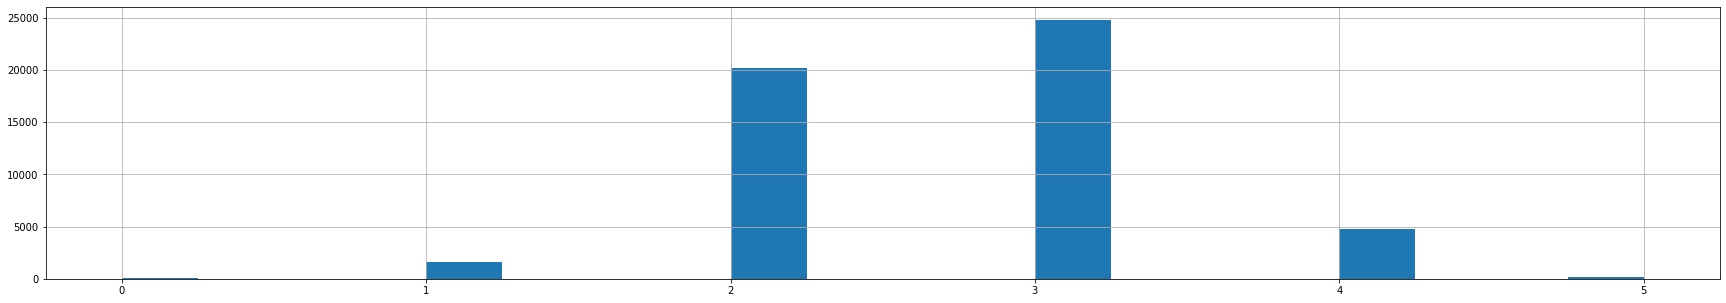

In [42]:
df['condition'].hist(bins=20, figsize=(30,5)) ;

### Conclusion condition of car:
1.Range for number of cylinders is between 0 to 5
2.Approx range of category that is most frequent is 2 and 3
3.0 and 5 are less frequent

### Identifying and addressing outliers

#### Price outlier

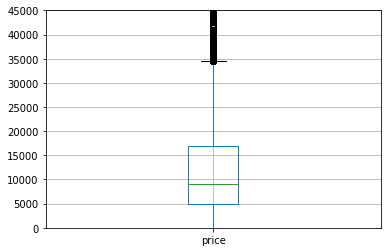

In [48]:
import matplotlib.pyplot as plt

plt.ylim(0,45000)
boxplot = df.boxplot(column=['price'],
                     return_type='axes')

### Findings : 
1. There exists many outliers which can be seen as a thick band above the IQR upper limit
2. The first quartile is the lower most limit for the range of the data
3. Most of the card were priced below Euro 35000 

#### Age of car 

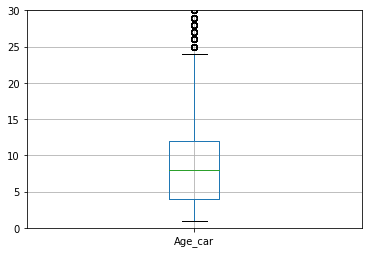

In [54]:
plt.ylim(0,30)
boxplot = df.boxplot(column=['Age_car'],
                     return_type='axes')

### Findings: 
* The lower limit of the range of data is aound 2 years and the upper limit is at 24 years. 
* However there are many outliers as seen by the dots above the upper limit of 24 years

#### Mileage

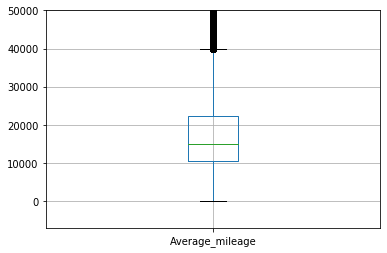

In [60]:
plt.ylim(-7000,50000)
boxplot = df.boxplot(column=['Average_mileage'],
                     return_type='axes')

### Findings:
* The lower limit for the average mileage is 0 
* The upper limit for average mileage is 40000. 
* The presence of a dark band above 40000 is an indication of many outliers

#### No. of cylinders outlier

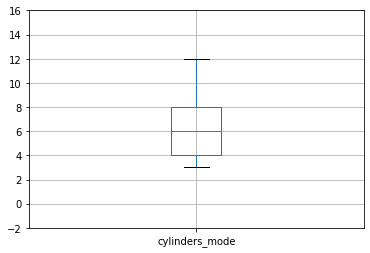

In [66]:
plt.ylim(-2,16)
boxplot = df.boxplot(column=['cylinders_mode'],
                     return_type='axes')

### Findings:
* The lower limit for the number of cylinders is 4 
* The upper limit is 12. 
* There are no outliers seen in this data

#### No. of condition

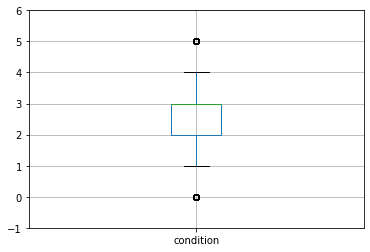

In [72]:
plt.ylim(-1,6)
boxplot = df.boxplot(column=['condition'],
                     return_type='axes')

### Findings:
* The lower limit for the condition is 2. 
* The upper limit is 3 which coincides with the mean.
* There are no outliers seen in this data.
* The highest point in the data range is 5.

# Outliers identified
1. Age of the car: Above 24
2. Price: Above 34597
3. Mileage : Above 39855
4. No. of cylinders : Cylinders above 14
5. Condition : all cars which fall above the category 5

# Removing outliers

In [73]:
filtered_data= df.query('price < 34977 and Age_car <= 24 and Average_mileage <= 39855 and cylinders_mode <= 14 and condition <=  5 ') 

In [75]:
filtered_data.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,cylinders_mode,model_year_median,odometer_mean,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
count,"46,206.0","42,738.0","46,206.0","41,497.0","39,454.0","22,474.0","46,206.0","46,206.0","46,206.0","46,206.0","46,206.0","46,206.0","46,206.0","46,206.0","46,206.0"
mean,"10,799.8","2,009.5",2.6,6.1,"118,558.9",1.0,39.6,6.1,"2,009.6","118,191.6",3.0,6.6,"2,018.3",8.8,"15,926.8"
std,"7,682.3",5.1,0.7,1.6,"62,387.5",0.0,28.2,1.6,5.0,"57,656.0",2.0,3.5,0.5,4.9,"7,924.1"
min,1.0,"1,994.0",0.0,3.0,1.0,1.0,0.0,3.0,"1,994.0",1.0,0.0,1.0,"2,018.0",1.0,0.0
25%,"4,995.0","2,006.0",2.0,4.0,"75,000.0",1.0,19.0,4.0,"2,006.0","84,000.0",1.0,3.0,"2,018.0",5.0,"10,459.0"
50%,"8,500.0","2,010.0",3.0,6.0,"116,861.0",1.0,33.0,6.0,"2,010.0","116,045.5",3.0,7.0,"2,018.0",8.0,"14,506.0"
75%,"14,995.0","2,013.0",3.0,8.0,"157,245.5",1.0,53.0,8.0,"2,013.0","150,000.0",5.0,10.0,"2,019.0",12.0,"20,069.5"
max,"34,966.0","2,019.0",5.0,12.0,"710,000.0",1.0,271.0,12.0,"2,019.0","710,000.0",6.0,12.0,"2,019.0",24.0,"39,854.0"


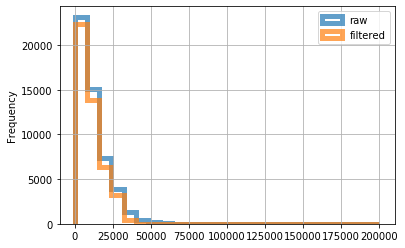

In [76]:
# comparison between price , before and after removing outliers
ax = df.plot(kind = 'hist', y = 'price', histtype = 'step', range =(1, 200000),
             bins = 25, linewidth=5, alpha = 0.7, label = 'raw')
filtered_data.plot(kind = 'hist', y = 'price', histtype = 'step', range =(1, 200000),
            bins = 25, linewidth=5, alpha = 0.7, label = 'filtered', ax=ax, grid = True, 
                   legend = True );

This histogram in comparison to the previous one has a more defined bell curve with a slight right skew. There is more of less a gradual trend on either side of the peak unlike to previous curve where the gradation was not so clear
The only data range which looks out of place is the one between 0-20. 

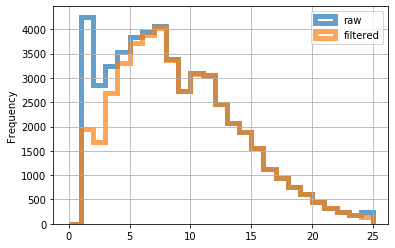

In [78]:
# comparison of age of car before adn after removing outliers
ax = df.plot(kind = 'hist', y = 'Age_car', histtype = 'step', range =(0, 25),
             bins = 25, linewidth=5, alpha = 0.7, label = 'raw')
filtered_data.plot(kind = 'hist', y = 'Age_car', histtype = 'step', range =(0, 25),
            bins = 25, linewidth=5, alpha = 0.7, label = 'filtered', ax=ax, grid = True, 
                   legend = True ) ;

This one too is a well defined bell curve as compared to the previous histogram. The majority of cars sold on the platform are around 7 years old which is clearly visible in this graph. Also all the data points can be easily represented with out a clear visibility of the range. 

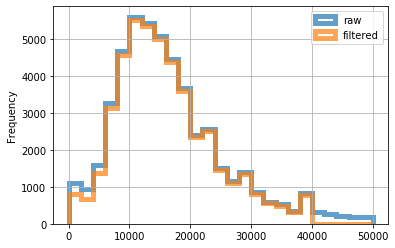

In [79]:
ax = df.plot(kind = 'hist', y = 'Average_mileage', histtype = 'step', range =(0, 50000),
             bins = 25, linewidth=5, alpha = 0.7, label = 'raw')
filtered_data.plot(kind = 'hist', y = 'Average_mileage', histtype = 'step', range =(0, 50000),
            bins = 25, linewidth=5, alpha = 0.7, label = 'filtered', ax=ax, grid = True, 
                   legend = True ) ;

This one too is a well defined bell curve as compared to the previous histogram. The majority of cars sold on the platform are around 7 years old which is clearly visible in this graph. Also the data range is clearly visible with a well defined gradation on both sides of the peak

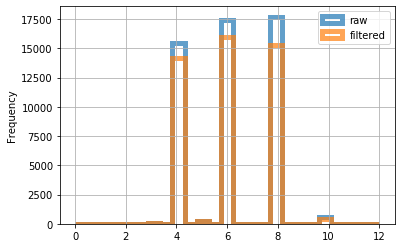

In [80]:
ax = df.plot(kind = 'hist', y = 'cylinders_mode', histtype = 'step', range =(0, 12),
             bins = 25, linewidth=5, alpha = 0.7, label = 'raw')
filtered_data.plot(kind = 'hist', y = 'cylinders_mode', histtype = 'step', range =(0, 12),
            bins = 25, linewidth=5, alpha = 0.7, label = 'filtered', ax=ax, grid = True, 
                   legend = True ) ;

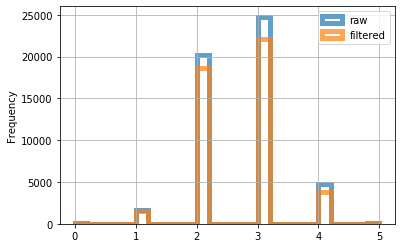

In [82]:
ax = df.plot(kind = 'hist', y = 'condition', histtype = 'step', range =(0, 5),
             bins = 25, linewidth=5, alpha = 0.7, label = 'raw')
filtered_data.plot(kind = 'hist', y = 'condition', histtype = 'step', range =(0, 5),
            bins = 25, linewidth=5, alpha = 0.7, label = 'filtered', ax=ax, grid = True, 
                   legend = True ) ;

Summary: 
1. The outliers increase the spread of the graph
2. The removal of outliers helped to create a graph with a more uniform spread.
3. Removal of outliers has not impacted the mean and the median of therefore we can safely drop these outliers and continue with the analysis

# Investigating days_listed for studying the the threshold days for ads

In [83]:
# When the data is recorded in the database my assumption is that there was an ad placed, threfore the days listed can not be 0. 
#So replacing this with 1
df.loc[ df.days_listed == 0, "days_listed" ] = 1

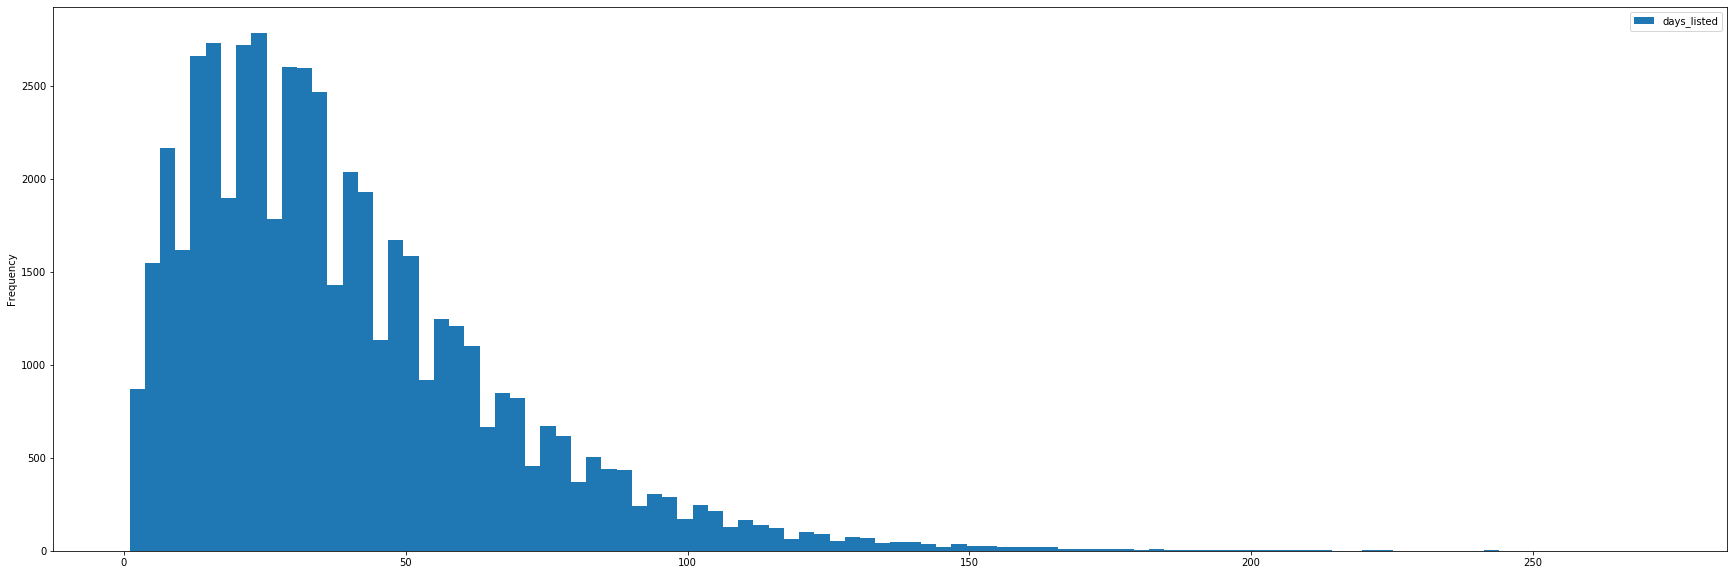

In [84]:
#Studying 'days_listed'
df.plot(kind = 'hist', y = 'days_listed',  bins = 100, figsize=(30,10) ) ;

Summary:
On an average majority of the ads stay on the website upto 50 days

### Conclusion

* Typical lifetime for an ad 19 to 53 days
* Ads that were listed for longer than 105 were removed

In [94]:
#Filtering the date by the outliers from days_listed
filtered_data_ads_high= df.query('days_listed > = 104 ') 
filtered_data_ads_high.describe()

,price,model_year,condition,cylinders,odometer,is_4wd,days_listed,cylinders_mode,model_year_median,odometer_mean,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
count,"1,701.0","1,586.0","1,701.0","1,519.0","1,415.0",840.0,"1,701.0","1,701.0","1,701.0","1,701.0","1,701.0","1,701.0","1,701.0","1,701.0","1,701.0"
mean,"11,853.4","2,009.5",2.6,6.2,"118,091.3",1.0,127.3,6.2,"2,009.6","117,747.3",3.0,6.5,"2,018.3",8.8,"18,906.5"
std,"9,371.0",6.4,0.7,1.7,"63,200.9",0.0,24.3,1.7,6.3,"57,645.0",2.0,3.5,0.5,6.2,"16,026.3"
min,1.0,"1,964.0",0.0,3.0,1.0,1.0,104.0,3.0,"1,964.0",1.0,0.0,1.0,"2,018.0",1.0,0.0
25%,"5,000.0","2,006.0",2.0,4.0,"73,000.0",1.0,110.0,4.0,"2,007.0","84,546.0",1.0,3.0,"2,018.0",5.0,"10,370.0"
50%,"8,995.0","2,010.0",3.0,6.0,"117,543.0",1.0,120.0,6.0,"2,010.0","116,045.5",3.0,7.0,"2,018.0",8.0,"15,186.0"
75%,"15,990.0","2,014.0",3.0,8.0,"156,283.5",1.0,136.0,8.0,"2,014.0","148,000.0",5.0,10.0,"2,019.0",12.0,"22,333.0"
max,"65,000.0","2,019.0",5.0,10.0,"500,000.0",1.0,271.0,10.0,"2,019.0","500,000.0",6.0,12.0,"2,019.0",55.0,"116,045.0"


Summary: A total of 1700 records were found where the ad was placed for longer than 104 days 

### Analyse the number of ads and average price for each vehicle type

In [95]:
#1. Number of ads for each type of 
df_filter =  df[['price', 'type']].pivot_table(index = 'type' , values = 'price' , aggfunc = ['count', 'mean'])
df_filter

,count,mean
,price,price
type,,
SUV,12405,"11,149.4"
bus,24,"17,135.7"
convertible,446,"14,575.9"
coupe,2303,"14,353.4"
hatchback,1047,"6,868.5"
mini-van,1161,"8,193.2"
offroad,214,"14,292.3"
other,256,"10,989.7"


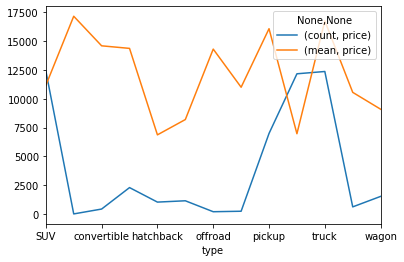

In [96]:
df_filter_chart = df_filter.plot()

Conclusion: SUV and Truck have the highest number of ads. 
There appears to be no strong corelation between the price and the number of ads.
However there is weak positive corelation. With increase in price there is an increase in the number of ads

# Investigating quantitative variables for category SUV

In [97]:
final_data_SUV = filtered_data.query('type == "SUV"')
final_data_SUV

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,paint_color_mode,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
0,9400,"2,011.0",bmw x5,2,6.0,gas,"145,000.0",automatic,SUV,NaN,1.0,2018-06-23,19,True,6,2011,"145,000.0",black,5,6,2018,7,"20,714.0"
7,15990,"2,013.0",honda pilot,3,6.0,gas,"109,473.0",automatic,SUV,black,1.0,2019-01-07,68,True,6,2013,"109,473.0",black,0,1,2019,6,"18,246.0"
8,11500,"2,012.0",kia sorento,3,4.0,gas,"104,174.0",automatic,SUV,NaN,1.0,2018-07-16,19,True,4,2012,"104,174.0",silver,0,7,2018,6,"17,362.0"
9,9200,"2,008.0",honda pilot,3,nan,gas,"147,191.0",automatic,SUV,blue,1.0,2019-02-15,17,True,6,2008,"147,191.0",blue,4,2,2019,11,"13,381.0"
14,12990,"2,009.0",gmc yukon,3,8.0,gas,"132,285.0",automatic,SUV,black,1.0,2019-01-31,24,True,8,2009,"132,285.0",black,3,1,2019,10,"13,228.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,"2,012.0",chevrolet traverse,2,6.0,gas,"144,500.0",automatic,SUV,NaN,1.0,2019-03-05,1,True,6,2012,"144,500.0",silver,1,3,2019,7,"20,643.0"
51496,4999,"2,002.0",toyota 4runner,3,6.0,gas,"177,901.0",automatic,SUV,NaN,1.0,2018-05-26,59,True,6,2002,"177,901.0",silver,5,5,2018,16,"11,119.0"
51500,6995,"2,012.0",buick enclave,3,6.0,gas,"157,000.0",automatic,SUV,white,1.0,2018-08-04,17,True,6,2012,"157,000.0",white,5,8,2018,6,"26,167.0"
51502,7995,"2,011.0",chevrolet equinox,4,4.0,gas,"111,088.0",automatic,SUV,NaN,nan,2019-04-01,175,False,4,2011,"111,088.0",black,0,4,2019,8,"13,886.0"


-0.5692177788992016

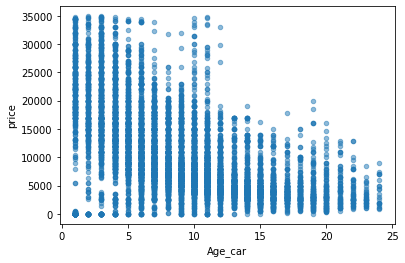

In [98]:
final_data_SUV.plot(x='Age_car', y= 'price', kind='scatter', alpha=0.5) 
final_data_SUV['Age_car'].corr(final_data_SUV['price'])

As was the case with the other data set here as well the age of the car and price are negatively co related.
with a few exceptions seen at 10 and 11 years it is generally a declinign trend seen with increasing age

0.26788121617734545

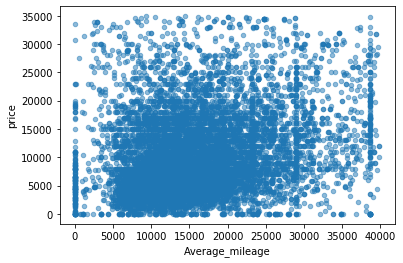

In [99]:
final_data_SUV.plot(x='Average_mileage', y= 'price', kind='scatter', alpha=0.5) 
final_data_SUV['Average_mileage'].corr(final_data_SUV['price'])

Average mileage is positively corelated with proce. the majority of the distribution is spread from 5000 to 25000 in mileage and the price is dense up till 15000. 

0.26526044783583097

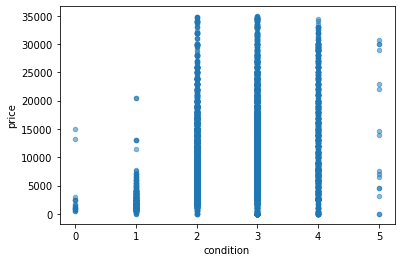

In [100]:
final_data_SUV.plot(x='condition', y= 'price', kind='scatter', alpha=0.5) 
final_data_SUV['condition'].corr(final_data_SUV['price'])

Condition and price as expected are positively corelated. Majority of the cars fall above 1 

# Summary
1. There is a positive corelation between mileage, condition , with price whereas for age the corelation is negative

Investigating categorical variables for category SUV

In [101]:
#Creating another table with the number of ads greater than equal to 50 for the two categorical variables

In [102]:
final_data_SUV.groupby(['transmission']).count()

,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,paint_color_mode,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
transmission,,,,,,,,,,,,,,,,,,,,,,
automatic,10796,9953,10796,10796,9724,10796,9218,10796,8861,7572,10796,10796,10796,10796,10796,10796,10796,10796,10796,10796,10796,10796
manual,462,424,462,462,414,462,388,462,372,400,462,462,462,462,462,462,462,462,462,462,462,462
other,140,131,140,140,126,140,123,140,118,125,140,140,140,140,140,140,140,140,140,140,140,140


We can keep the transmission category since each transmission category has more than 50 ads

In [103]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

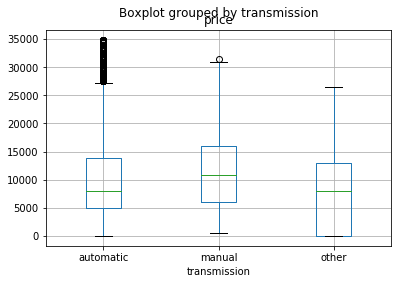

In [104]:
boxplot = final_data_SUV.boxplot(column=['price'], by='transmission',
                     return_type='axes')

Summary:

1. The automatic cars have a heavy number of outliers. Range for automatic cars for price is between 0 to 27000. 50% of the cars fall within 7500 range . Most of the cars are below 
2. For manual transmission most of the cars fall within the range. The prices are in general higher than the automatic
3. Others : have no outliers, the prices are lower than both the other groups.Majority of the cars 75% fall below 15000 

In [105]:
final_data_SUV.groupby(['paint_color_mode']).count()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
paint_color_mode,,,,,,,,,,,,,,,,,,,,,,
black,3008,2793,3008,3008,2727,3008,2566,3008,3008,1984,2234,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008,3008
blue,1070,979,1070,1070,963,1070,900,1070,1070,974,786,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070,1070
brown,354,317,354,354,309,354,307,354,354,354,214,354,354,354,354,354,354,354,354,354,354,354
custom,294,273,294,294,270,294,247,294,294,294,198,294,294,294,294,294,294,294,294,294,294,294
green,459,419,459,459,418,459,379,459,459,423,360,459,459,459,459,459,459,459,459,459,459,459
grey,1238,1155,1238,1238,1095,1238,1055,1238,1238,1086,865,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238,1238
orange,74,63,74,74,66,74,68,74,74,74,64,74,74,74,74,74,74,74,74,74,74,74
purple,38,36,38,38,31,38,31,38,38,38,27,38,38,38,38,38,38,38,38,38,38,38
red,850,795,850,850,775,850,727,850,850,850,614,850,850,850,850,850,850,850,850,850,850,850


Removing the yellow and purple paint color since they have less than 50 ads. 

In [106]:
Color_SUV = ['yellow', 'purple']

In [107]:
data_SUV_color = final_data_SUV.loc[~final_data_SUV['paint_color_mode'].isin (Color_SUV )]
data_SUV_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,paint_color_mode,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
0,9400,"2,011.0",bmw x5,2,6.0,gas,"145,000.0",automatic,SUV,NaN,1.0,2018-06-23,19,True,6,2011,"145,000.0",black,5,6,2018,7,"20,714.0"
7,15990,"2,013.0",honda pilot,3,6.0,gas,"109,473.0",automatic,SUV,black,1.0,2019-01-07,68,True,6,2013,"109,473.0",black,0,1,2019,6,"18,246.0"
8,11500,"2,012.0",kia sorento,3,4.0,gas,"104,174.0",automatic,SUV,NaN,1.0,2018-07-16,19,True,4,2012,"104,174.0",silver,0,7,2018,6,"17,362.0"
9,9200,"2,008.0",honda pilot,3,nan,gas,"147,191.0",automatic,SUV,blue,1.0,2019-02-15,17,True,6,2008,"147,191.0",blue,4,2,2019,11,"13,381.0"
14,12990,"2,009.0",gmc yukon,3,8.0,gas,"132,285.0",automatic,SUV,black,1.0,2019-01-31,24,True,8,2009,"132,285.0",black,3,1,2019,10,"13,228.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51495,9500,"2,012.0",chevrolet traverse,2,6.0,gas,"144,500.0",automatic,SUV,NaN,1.0,2019-03-05,1,True,6,2012,"144,500.0",silver,1,3,2019,7,"20,643.0"
51496,4999,"2,002.0",toyota 4runner,3,6.0,gas,"177,901.0",automatic,SUV,NaN,1.0,2018-05-26,59,True,6,2002,"177,901.0",silver,5,5,2018,16,"11,119.0"
51500,6995,"2,012.0",buick enclave,3,6.0,gas,"157,000.0",automatic,SUV,white,1.0,2018-08-04,17,True,6,2012,"157,000.0",white,5,8,2018,6,"26,167.0"
51502,7995,"2,011.0",chevrolet equinox,4,4.0,gas,"111,088.0",automatic,SUV,NaN,nan,2019-04-01,175,False,4,2011,"111,088.0",black,0,4,2019,8,"13,886.0"


In [108]:
import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")

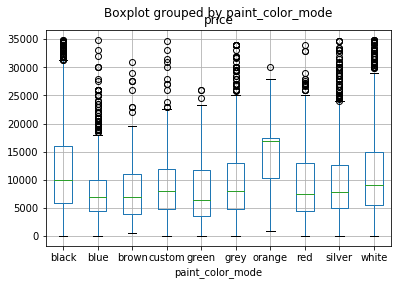

In [109]:
boxplot = data_SUV_color.boxplot(column=['price'], by='paint_color_mode',
                     return_type='axes')

1. Most cars have outliers. The high volumes of outliers show that there is no pattern to the distribution. 
2. Range is the highest for black color cars
3. There are many outliers.
4. Colors like blue, silver, black , grey, white have a dense concetration at the outliers. 
5. Since there are many points outside the range means corelation is difficult to establish

Investigating quantitative variables for category truck

In [110]:
final_data_Truck = filtered_data.query('type == "truck"')
final_data_Truck

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,paint_color_mode,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
22,7500,"2,004.0",chevrolet silverado,4,8.0,gas,"180,000.0",automatic,truck,red,1.0,2019-01-05,64,True,8,2004,"180,000.0",red,5,1,2019,15,"12,000.0"
39,8000,"2,009.0",ford f-150,2,8.0,gas,"234,000.0",automatic,truck,black,1.0,2019-03-31,1,True,8,2009,"234,000.0",black,6,3,2019,10,"23,400.0"
50,6200,"2,006.0",ford f-150,3,6.0,gas,"69,698.0",automatic,truck,custom,nan,2018-05-03,50,False,6,2006,"69,698.0",custom,3,5,2018,12,"5,808.0"
53,10400,"2,012.0",chevrolet colorado,3,5.0,gas,"111,871.0",automatic,truck,red,1.0,2019-01-30,27,True,5,2012,"111,871.0",red,2,1,2019,7,"15,982.0"
60,13000,"2,005.0",ram 1500,2,8.0,gas,"146,000.0",automatic,truck,grey,1.0,2019-03-14,26,True,8,2005,"146,000.0",grey,3,3,2019,14,"10,429.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51482,13900,"2,006.0",chevrolet silverado 1500,3,8.0,gas,"152,000.0",automatic,truck,NaN,1.0,2018-05-08,33,True,8,2006,"152,000.0",white,1,5,2018,12,"12,667.0"
51487,1495,nan,ford f-150,1,6.0,gas,"15,804.0",manual,truck,white,1.0,2018-09-18,56,True,6,2011,"15,804.0",white,1,9,2018,7,"2,258.0"
51497,2995,"2,001.0",ford f150,2,8.0,gas,"206,257.0",automatic,truck,red,nan,2018-12-02,12,False,8,2001,"206,257.0",red,6,12,2018,17,"12,133.0"
51498,15900,"2,011.0",gmc sierra 1500,3,8.0,gas,nan,automatic,truck,NaN,1.0,2019-01-25,69,True,8,2011,"116,045.5",white,4,1,2019,8,"14,506.0"


-0.5978196765459226

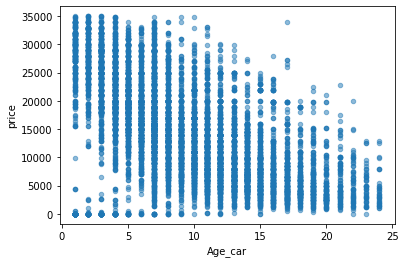

In [111]:
final_data_Truck.plot(x='Age_car', y= 'price', kind='scatter', alpha=0.5) 
final_data_Truck['Age_car'].corr(final_data_Truck['price'])

Corelation is negative between age and price as was the case in the above 2 cases as well

0.26768198536414445

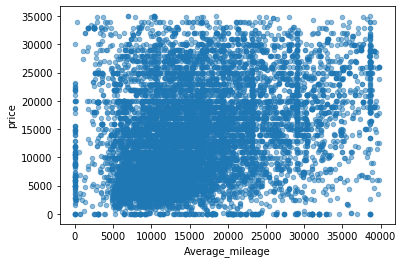

In [112]:
final_data_Truck.plot(x='Average_mileage', y= 'price', kind='scatter', alpha=0.5) 
final_data_Truck['Average_mileage'].corr(final_data_Truck['price'])

Positive corelation again the same as the above 2 cases. However unusual spread seen around 0 value 

0.2927623334601879

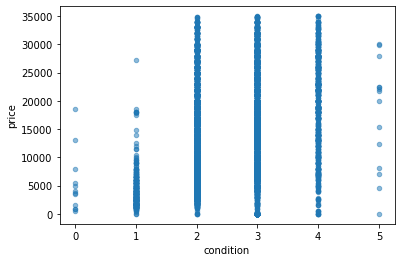

In [113]:
final_data_Truck.plot(x='condition', y= 'price', kind='scatter', alpha=0.5) 
final_data_Truck['condition'].corr(final_data_Truck['price'])

Majority of the trucks are in the 2 to 4 condition range . 

Investigating categorical variables for category SUV

In [114]:
#Creating another table with the number of ads greater than equal to 50 for the two categorical variables

In [115]:
final_data_Truck.groupby(['transmission']).count()

,price,model_year,model,condition,cylinders,fuel,odometer,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,paint_color_mode,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
transmission,,,,,,,,,,,,,,,,,,,,,,
automatic,10053,9319,10053,10053,9022,10053,8575,10053,8303,7503,10053,10053,10053,10053,10053,10053,10053,10053,10053,10053,10053,10053
manual,395,363,395,395,352,395,327,395,337,252,395,395,395,395,395,395,395,395,395,395,395,395
other,161,149,161,161,142,161,143,161,136,144,161,161,161,161,161,161,161,161,161,161,161,161


We can keep the transmission category since each transmission category has more than 50 ads

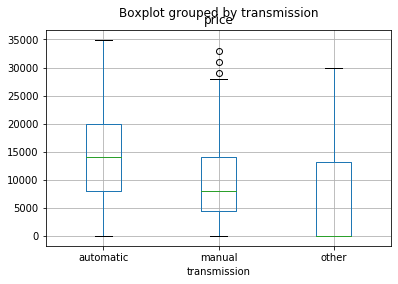

In [116]:
boxplot = final_data_Truck.boxplot(column=['price'], by='transmission',
                     return_type='axes')

The price is within range for the automatic range. However manual transmission doesnt show this corelation. Others fall within the range 

In [117]:
final_data_Truck.groupby(['paint_color_mode']).count()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
paint_color_mode,,,,,,,,,,,,,,,,,,,,,,
black,1327,1209,1327,1327,1176,1327,1137,1327,1327,1315,1077,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327,1327
blue,805,746,805,805,727,805,684,805,805,805,628,805,805,805,805,805,805,805,805,805,805,805
brown,232,216,232,232,205,232,194,232,232,232,162,232,232,232,232,232,232,232,232,232,232,232
custom,299,281,299,299,269,299,260,299,299,299,239,299,299,299,299,299,299,299,299,299,299,299
green,263,239,263,263,238,263,219,263,263,263,220,263,263,263,263,263,263,263,263,263,263,263
grey,807,753,807,807,741,807,679,807,807,806,633,807,807,807,807,807,807,807,807,807,807,807
orange,46,44,46,46,40,46,37,46,46,46,33,46,46,46,46,46,46,46,46,46,46,46
purple,14,14,14,14,14,14,11,14,14,14,12,14,14,14,14,14,14,14,14,14,14,14
red,950,895,950,950,866,950,826,950,950,950,739,950,950,950,950,950,950,950,950,950,950,950


Removing the yellow and purple paint color since they have less than 50 ads. 

In [118]:
Color = ['yellow' , 'purple' ,'orange']

In [119]:
data_Truck_color = final_data_Truck.loc[~final_data_Truck['paint_color_mode'].isin (Color )]
data_Truck_color

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,is_4wd_processed,cylinders_mode,model_year_median,odometer_mean,paint_color_mode,date_posted_week,date_posted_month,date_posted_year,Age_car,Average_mileage
22,7500,"2,004.0",chevrolet silverado,4,8.0,gas,"180,000.0",automatic,truck,red,1.0,2019-01-05,64,True,8,2004,"180,000.0",red,5,1,2019,15,"12,000.0"
39,8000,"2,009.0",ford f-150,2,8.0,gas,"234,000.0",automatic,truck,black,1.0,2019-03-31,1,True,8,2009,"234,000.0",black,6,3,2019,10,"23,400.0"
50,6200,"2,006.0",ford f-150,3,6.0,gas,"69,698.0",automatic,truck,custom,nan,2018-05-03,50,False,6,2006,"69,698.0",custom,3,5,2018,12,"5,808.0"
53,10400,"2,012.0",chevrolet colorado,3,5.0,gas,"111,871.0",automatic,truck,red,1.0,2019-01-30,27,True,5,2012,"111,871.0",red,2,1,2019,7,"15,982.0"
60,13000,"2,005.0",ram 1500,2,8.0,gas,"146,000.0",automatic,truck,grey,1.0,2019-03-14,26,True,8,2005,"146,000.0",grey,3,3,2019,14,"10,429.0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51482,13900,"2,006.0",chevrolet silverado 1500,3,8.0,gas,"152,000.0",automatic,truck,NaN,1.0,2018-05-08,33,True,8,2006,"152,000.0",white,1,5,2018,12,"12,667.0"
51487,1495,nan,ford f-150,1,6.0,gas,"15,804.0",manual,truck,white,1.0,2018-09-18,56,True,6,2011,"15,804.0",white,1,9,2018,7,"2,258.0"
51497,2995,"2,001.0",ford f150,2,8.0,gas,"206,257.0",automatic,truck,red,nan,2018-12-02,12,False,8,2001,"206,257.0",red,6,12,2018,17,"12,133.0"
51498,15900,"2,011.0",gmc sierra 1500,3,8.0,gas,nan,automatic,truck,NaN,1.0,2019-01-25,69,True,8,2011,"116,045.5",white,4,1,2019,8,"14,506.0"


In [120]:
data_Truck_color['paint_color_mode'].unique()

array(['red', 'black', 'custom', 'grey', 'white', 'silver', 'brown',
       'blue', 'green'], dtype=object)

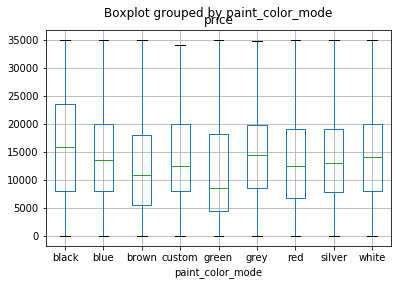

In [121]:
boxplot = data_Truck_color.boxplot(column=['price'], by='paint_color_mode',
                     return_type='axes')

Most the observations fall within the range. It is seen that majority of the trucks are in the colour black. Black trucks are most expensive. However the h´distribution is almost the same implies the color and price are not related

# Final conclusion

1. A total of 51525 observations are recorded in the data
2. Missing values were found at year, cylindery, odomerter, paint colur and is 4wd. 
3. No duplicates were observed
4. Data types were changed forthe following:
#a.date_posted - datetime - since it is a date 
#b. is_wd_processed - integer since there are either 1 or 0 as the values representing present and absence of the feature
#c. cylinder_mode- integer - again these range from 3 to 12 
#d. model_year_median - datetime - since it is a year value
5. The spread for all variables were skewed to the left. 
7. The corelation between the price and age was negative , while with the other parameters, mileage, number of cylinders and condition it was positive
6. Presence of outliers were detected and the histograms were observed after teh removal of the outliers. 
7. An observation after the removal of the outliers is that the histograms spread was compressed and there was a distinct bell shape although still the skewness was present.
8. Lifetime of an advertisement is 15 to 50 days. Outlier was identified as 104 days. Value of 0 days was replaced with 1 assuming that if the record is present the ad is placed on the website. Ads that were listed for longer than 105 to 250days are ads that stayed longer than typical times and ads that stayed for lesser than 19 days were removed quickly
9.  The number of ads wrt price of ads was studies for different types of vehicles. SUV and Truck have the highest number of ads. There appears to be no strong corelation between the price and the number of ads. However there is weak positive corelation. With increase in price there is an increase in the number of ads
10. SUV and trucks were identified as the vehicles of interest. Categorical and quantitative variables were studied for these 2 vehicle type
11. Similar observations wrt corelation were present for these 2 variables as well with the quantitiave variables. 
12. For categorical variables there Price is impacted by the colour of the car, most common colour is black however for colours like blue, silver, white, grey , blue and black there are a number of outliers. Maybe people  